## Problem Set 6: Predictive Modeling

### Name: Gabriella Rivera

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

#### 1 Predict Airbnb Price 

1.

In [263]:
airbnb = pd.read_csv('airbnb-bangkok-listings.csv.bz2', sep=',', usecols=['bedrooms', 'price', 'accommodates', 'room_type'])
airbnb.head()

,room_type,accommodates,bedrooms,price
0,Entire home/apt,3,1.0,"$1,845.00"
1,Private room,2,1.0,"$1,275.00"
2,Private room,2,1.0,$800.00
3,Private room,2,1.0,$800.00
4,Private room,2,1.0,"$1,845.00"


In [264]:
airbnb['price'] = airbnb['price'].str.replace('$', '')  # Remove dollar sign
airbnb['price'] = airbnb['price'].str.replace(',', '')  # Remove commas

airbnb['price'] = pd.to_numeric(airbnb['price'])

In [265]:
clean_airbnb = airbnb.dropna(subset=['bedrooms', 'price', 'accommodates', 'room_type'])

In [266]:
clean_airbnb.isna().any()

room_type       False
accommodates    False
bedrooms        False
price           False
dtype: bool

2.

In [267]:
clean_airbnb['bedrooms'] = clean_airbnb['bedrooms'].astype(int)
clean_airbnb.loc[clean_airbnb['bedrooms'] >= 4, 'bedrooms'] = 4

C:\Users\Gabriella Rivera\AppData\Local\Temp\ipykernel_4632\2925388353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_airbnb['bedrooms'] = clean_airbnb['bedrooms'].astype(int)


In [268]:
m = smf.ols('np.log(price) ~ bedrooms + room_type + accommodates', data = clean_airbnb).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     945.5
Date:                Thu, 16 May 2024   Prob (F-statistic):               0.00
Time:                        21:42:00   Log-Likelihood:                -16582.
No. Observations:               15200   AIC:                         3.318e+04
Df Residuals:                   15194   BIC:                         3.322e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     6.5849      0.015    449.007      0.000       6.556       6.614
room_type[T.Hotel room]       0.1047      0.028      3.799      0.000       0.051       0.159
room_type[T.Private room]    -0.0856      0.013     -6.745      0.000      -0.110      -0.061
room_type[T.Shared room]     -0.7983      0.030    -26.701      0.000      -0.857      -0.740
bedrooms                      0.4171      0.012     35.224      0.000       0.394       0.440
accommodates                  0.0394      0.004     11.136      0.000       0.032       0.046
==============================================================================
Omnibus:                     4221.820   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22128.885
Skew:                           1.241   Prob(JB):                         0.00
Kurtosis:                       8.365   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2.

In [269]:
phat = m.predict()
phat
# phat[:10]

array([7.12010689, 6.995152  , 6.995152  , ..., 7.6159347 , 7.08074826,
       7.12010689])

3.

In [270]:
rmse = np.sqrt(np.mean((phat - np.log(clean_airbnb.price))**2))
rmse

0.7203383032636651

4.

In [271]:
newDat = {"bedrooms": [2], "accommodates": [4], "room_type": ["Entire home/apt"]}
predicted_log_price = m.predict(newDat)
predicted_log_price

0    7.576576
dtype: float64

In [272]:
predicted_price = np.exp(predicted_log_price)
predicted_price                          

0    1951.934226
dtype: float64

5.

In [273]:
filtered_df = clean_airbnb[(clean_airbnb['bedrooms'] == 2) & (clean_airbnb['accommodates'] == 4)]
filtered_df

,room_type,accommodates,bedrooms,price
25,Entire home/apt,4,2,1174.0
30,Entire home/apt,4,2,2516.0
35,Entire home/apt,4,2,1747.0
60,Entire home/apt,4,2,2684.0
66,Private room,4,2,2000.0
...,...,...,...,...
16982,Entire home/apt,4,2,2000.0
16983,Entire home/apt,4,2,2800.0
17009,Entire home/apt,4,2,2179.0
17010,Entire home/apt,4,2,2179.0


In [274]:
average_log_price = np.mean(np.log(filtered_df['price']))
average_log_price

7.728450922007424

In [275]:
diff = average_log_price - predicted_log_price
diff

0    0.151875
dtype: float64

The average log price is 0.151875 greater than the predicted log price

#### Heart Attack: predictive modeling 

##### 2.1 Logit with sklearn

1.

In [276]:
heart = pd.read_csv('heart.csv.bz2', sep=',')
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [277]:
heart.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

2.

In [ ]:
# Drop the 'output' column to create the design matrix X
X = heart.drop(columns=['output'])
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


3.

The design matrix should not contain output because output is the outcome, our outcome vector, our y value, our intercept. 

4.

In [279]:
# Generate dummy variables
X1 = pd.get_dummies(X, columns=["cp", "restecg"], drop_first=True, dtype=int)

X1.sample(5)

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,cp_1,cp_2,cp_3,restecg_1,restecg_2
118,46,0,105,204,0,172,0,0.0,2,0,2,1,0,0,1,0
6,56,0,140,294,0,153,0,1.3,1,0,2,1,0,0,0,0
70,54,1,120,258,0,147,0,0.4,1,0,3,0,1,0,0,0
108,50,0,120,244,0,162,0,1.1,2,0,2,1,0,0,1,0
243,57,1,152,274,0,88,1,1.2,1,1,3,0,0,0,1,0


In [280]:
X1.shape

(303, 16)

5.

In [281]:
y = heart['output']

In [282]:
m = LogisticRegression(max_iter=2000)
_ = m.fit(X1, y)

In [283]:
m.intercept_, m.coef_

(array([2.37536353]),
 array([[-9.45647772e-04, -1.38120877e+00, -1.53015142e-02,
         -4.29125325e-03,  4.90335020e-02,  2.33301506e-02,
         -8.81894385e-01, -4.64392494e-01,  4.64661729e-01,
         -7.34344097e-01, -8.16746819e-01,  8.00204222e-01,
          1.51905186e+00,  1.37773529e+00,  4.15695216e-01,
         -5.62139262e-02]]))

##### 2.2 Predictive Modeling

1.

In [284]:
phat = m.predict_proba(X1)[:,1]
phat[:10]

array([0.6807975 , 0.71824513, 0.94934094, 0.91569662, 0.78917937,
       0.78664769, 0.8199106 , 0.84798238, 0.81295294, 0.92209013])

2.

In [285]:
yhat = m.predict(X1)
yhat[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

3.

In [286]:
yhat = phat > .5 
yhat[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

4.

In [287]:
cm = confusion_matrix(y, yhat)
cm

array([[105,  33],
       [ 14, 151]], dtype=int64)

5.

Precision = TP / TP + FP

In [288]:
tp = cm[1,1]
fp = cm[0,1]
precision = cm[1,1] / (cm[0,1] + cm[1,1])
precision = tp / tp + fp
precision

34.0

In [289]:
from sklearn.metrics import precision_score

precision_score(y, yhat)

0.8206521739130435

Recall =  TP / TP + FN

In [290]:
fn = cm[1,0]
recall = cm[1,1] / (cm[1,1] + cm[1,0])
recall = tp /(tp + fn) 
recall

0.9151515151515152

In [291]:
from sklearn.metrics import recall_score
recall_score(y, yhat)

0.9151515151515152

6.

In the context of predicting heart attacks, recall is often the most critical measure to improve. This is because the consequences of missing a heart attack (a false negative) are much more severe than falsely predicting a heart attack (a false positive). Missing a diagnosis could lead to a patient not receiving necessary and potentially life-saving treatment. Therefore, improving recall ensures that most, if not all, actual heart attack cases are identified.

7.

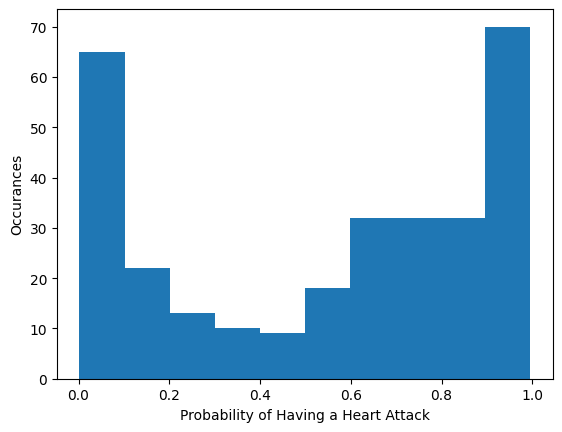

In [292]:
plt.hist(phat)
plt.xlabel("Probability of Having a Heart Attack")
plt.ylabel("Occurances")
_ = plt.show()

The model is more confident than it is uncertain, but not by a huge margin.

8.

In [293]:
pd.crosstab(y, yhat)

col_0,False,True
output,,
0,105,33
1,14,151


In [294]:
# Count the occurrences of each class in the 'output' column
counts = heart['output'].value_counts()
counts

output
1    165
0    138
Name: count, dtype: int64

Since the naive model predicts 1 for all instances:

- TP: Number of instances actually 1 (165).

- FN: 0 (since we never predict 0).

- FP: Number of instances actually 0 (138).

- TN: 0 (since we never predict 0).

In [295]:
tp = 165
tn = 0
fp = 138
fn = 0

In [296]:
confusion_matrix = [[tp, fn], [fp, tn]]
confusion_matrix

[[165, 0], [138, 0]]

In [297]:
total_instances = np.sum(confusion_matrix)

In [298]:
accuracy = (tp + tn) / total_instances
accuracy

0.5445544554455446

In [299]:
precision = tp / (tp + fp)
precision

0.5445544554455446

In [300]:
recall = tp /(tp + fn) 
recall

1.0

These values indicate that while the naive model is 100% sensitive (recall) in predicting the most common class (heart attack), it is not very precise, and its accuracy is just over 50%. This reflects the model's bias towards the most common class without distinguishing the minority class.

#### Confusion Matrix

##### 3.1 Poisonous Mushrooms

| |  |**Predicted** | |
|-------|-------- | ------------: | ------:|
| | | Poisonous | Edible |
| **Actual**| Poisonous |1 | 3 |
| | Edible |2|4|

1.

##### M1 Prediction Table :

|       |         |**Predicted**  |        |
|-------|-------- | ------------: | ------:|
| |                | Poisonous | Edible |
| **Actual**| Poisonous    | 3 | 0 |
|           | Edible       | 3 | 4 |

##### M2 Prediction Table :

|       |         |**Predicted**  |        |
|-------|-------- | ------------: | ------:|
| |                | Poisonous | Edible |
| **Actual**| Poisonous    | 2 | 1 |
|           | Edible       | 0 | 7 |

2.

In [303]:
total_tests = 10 

M1 Accuracy, Precision, Recall:

In [305]:
m1_tp = 4
m1_tn = 3
m1_fp = 0
m1_fn = 3

In [306]:
m1_accuracy = (m1_tp + m1_tn) / total_tests
m1_accuracy

0.7

In [308]:
m1_precision = m1_tp / (m1_tp + m1_fp)
m1_precision

1.0

In [316]:
m1_recall = m1_tp /(m1_tp + m1_fn)
m1_recall

0.5714285714285714

M2 Accuracy, Precision, Recall:

In [311]:
m2_tp = 7
m2_tn = 2 
m2_fp = 1
m2_fn = 0

In [312]:
m2_accuracy = (m2_tp + m2_tn) / total_tests
m2_accuracy

0.9

In [313]:
m2_precision = m2_tp / (m2_tp + m2_fp)
m2_precision

0.875

In [317]:
m2_recall = m2_tp /(m2_tp + m2_fn)
m2_recall

1.0

3.

If Prof. Joffe was actually using these models to determine which mushrooms he, or students, should consume, then I would suggest goint with the first model, M1, since it is more precise. Precision, in this case, is sensitive to false positives. A false positive means the mushroom was determined edible when it was in fact poisonous. Since consuming a poisonous mushroom is highly undesirable, and far worse than wasting a couple good mushrooms (higher recall), M1 is the preffered model.

##### 3.2 Defendants

1.

##### M3 Prediction Table :

|       |         |**Predicted**  |        |
|-------|-------- | ------------: | ------:|
| |                 |     Guilty | Innocent |
| **Actual**| Guilty         | 4 | 1 |
|           | Innocent       | 2 | 3 |

##### M4 Prediction Table :

|       |         |**Predicted**  |        |
|-------|-------- | ------------: | ------:|
| |                 |     Guilty | Innocent |
| **Actual**| Guilty         | 2 | 3 |
|           | Innocent       | 0 | 5 |

2.

M3 Accuracy, Precision, Recall:

In [318]:
m3_tp = 3
m3_tn =  4
m3_fp = 1
m3_fn = 2

In [322]:
m3_accuracy = (m3_tp + m3_tn) / total_tests
m3_accuracy

0.7

In [320]:
m3_precision = m3_tp / (m3_tp + m3_fp)
m3_precision

0.75

In [321]:
m3_recall = m3_tp /(m3_tp + m3_fn)
m3_recall

0.6

M4 Accuracy, Precision, Recall:

In [323]:
m4_tp = 5
m4_tn = 2
m4_fp = 3
m4_fn = 0

In [324]:
m4_accuracy = (m4_tp + m4_tn) / total_tests
m4_accuracy

0.7

In [325]:
m4_precision = m4_tp / (m4_tp + m4_fp)
m4_precision

0.625

In [326]:
m4_recall = m4_tp /(m4_tp + m4_fn)
m4_recall

1.0

3.

Given that both models are just as accurate and nearly just as precise, I would recommend she use the second model since recall is 1.0, meaning there were no false negatives. The judge certainly would't want to convict innocent individuals, which would be the result of a false negative.

##### Defendants Again

1.

##### M3 Prediction Table Swapped :

|       |         |**Predicted**  |        |
|-------|-------- | ------------: | ------:|
| |                 |     Innocent | Guilty |
| **Actual**| Innocent        | 3 | 2 |
|           | Guilty          | 1 | 4 |

##### M4 Prediction Table Swapped :

|       |         |**Predicted**  |        |
|-------|-------- | ------------: | ------:|
| |                 |     Innocent | Guilty |
| **Actual**| Innocent         | 5 | 0 |
|           | Guilty           | 3 | 2 |

2.

M3 Swapped Accuracy, Precision, Recall:

In [327]:
m3s_tp = 4
m3s_tn =  3
m3s_fp = 2
m3s_fn = 1

In [328]:
m3s_accuracy = (m3s_tp + m3s_tn) / total_tests
m3s_accuracy

0.7

In [329]:
m3s_precision = m3s_tp / (m3s_tp + m3s_fp)
m3s_precision

0.6666666666666666

In [330]:
m3s_recall = m3s_tp /(m3s_tp + m3s_fn)
m3s_recall

0.8

M4 Swapped Accuracy, Precision, Recall:

In [331]:
m4s_tp = 2
m4s_tn = 5
m4s_fp = 0
m4s_fn = 3

In [337]:
m4s_accuracy = (m4s_tp + m4s_tn) / total_tests
m4s_accuracy

0.7

In [336]:
m4s_precision = m4s_tp / (m4s_tp + m4s_fp)
m4s_precision

1.0

In [335]:
m4s_recall = m4s_tp /(m4s_tp + m4s_fn)
m4s_recall

0.4

3.

In [338]:
print(m3_accuracy)
print(m3_precision)
print(m3_recall)

0.7
0.75
0.6


In [339]:
print(m3s_accuracy)
print(m3s_precision)
print(m3s_recall)

0.7
0.6666666666666666
0.8


In [340]:
print(m4_accuracy)
print(m4_precision)
print(m4_recall)

0.7
0.625
1.0


In [341]:
print(m4s_accuracy)
print(m4s_precision)
print(m4s_recall)

0.7
1.0
0.4


Swapping which values represent *Positive* and *Negative* does not affect the accuracy. It does however affect precision and recall. When we increase recall, we decrease precision. While recall expresses the ability to find all relevant instances of a class in a data set, precision expresses the proportion of the data points our model says existed in the relevant class that were indeed relevant. Swapping the classes still leads me to favor M4. In this case, precision is more important in my opinion.   